# Compass Numbers and Time

Imagine you live in an earth-like planet with really similar science where  it happens that your accepted calendar is always composed of 360 days, so in school when you were introduced to angles, pythagoras,trigonometry it was natural to use the example that each $1º$ rotation was a measure of the arc traced around the central star during a full rotation of your planet around it's axis, what happens to be also 24 hours. 

## What have clocks, roots of unity and modular arithmetic in common?

In [1]:
import pandas as pd
import numpy as np
import calendar
import random
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.text import TextPath
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import image
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, FFMpegWriter
import warnings
warnings.filterwarnings("ignore")
import compass_functions as cf



In [2]:
plt.rcParams.update({
        "lines.color": "black",
        "patch.edgecolor": "white",
        "text.color": "white",
        "axes.facecolor": "black",
        "axes.edgecolor": "black",
        "axes.labelcolor": "black",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "gray",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black"})


### Simple mod 24 clock using compass numbers to represent the hour of the day

In the in our experimental earth-like planet the usual clock is mod 24 , and the n

The expression using compass-number $\Theta=e^{i}$ over discrete time index $h \in \mathbb{N}_0$ . Remember this is just a notation trick to place as an argument of the $exp()$ function the value $i\theta=i\omega_k k$

$$\hat h_h =r_h \Theta^{\omega_h h}$$

In [3]:
mod_24_clk  =   cf.compass(r=1,T=24,s=np.arange(24)%24)

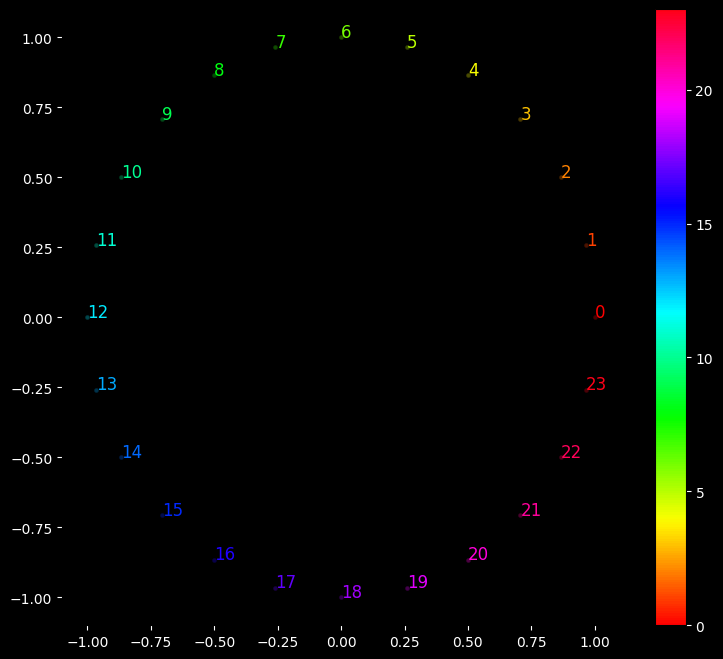

In [4]:
cf.plot_atlas_text(atlas=mod_24_clk
                ,symbol=np.arange(mod_24_clk.size),
                cmap=plt.cm.hsv,
                alpha=0.3,
                sx=9,
                sy=8,
                legend_flag=1,
                variable_sizes=0,
                base_size=12)

In [5]:
mod_24_log_clk  =   cf.compass(r=np.log(np.arange(24)+1),T=24,s=np.arange(24))

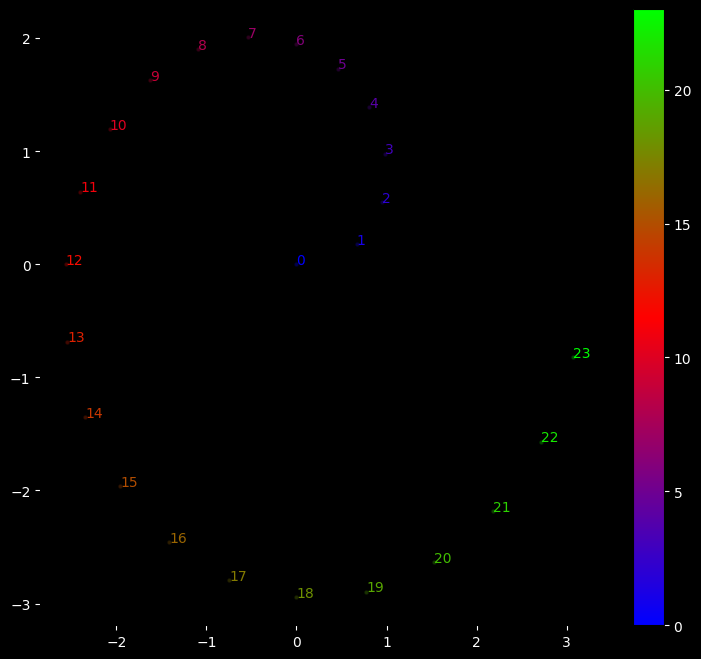

In [6]:
cf.plot_atlas_text(atlas=mod_24_log_clk
                ,symbol=np.arange(mod_24_log_clk.size),
                cmap=plt.cm.brg,
                alpha=0.3,
                sx=9,
                sy=8,
                legend_flag=1,
                variable_sizes=0,
                base_size=10)

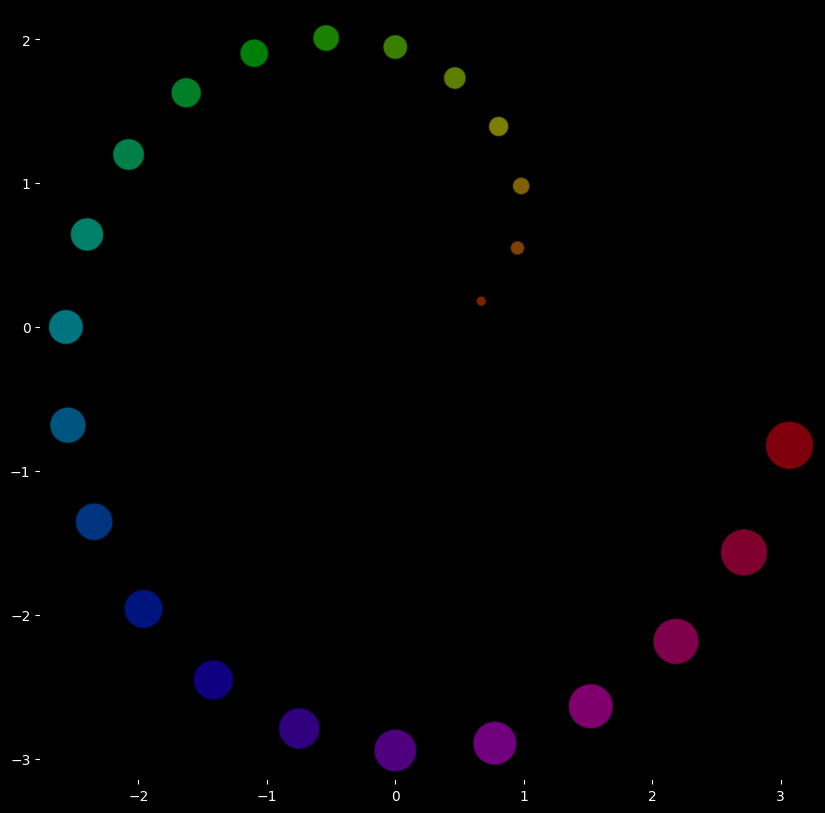

In [7]:
cf.get_atlas_video(atlas_in=mod_24_log_clk,
                         symbol=np.arange(mod_24_clk.size),
                           fps=1,
                             colormap=plt.cm.hsv, 
                            output_path='./readme/mod_24_log_clk.mp4', 
                            variable_size=1, 
                            fixed_size=12, 
                            padding=0.2, 
                            sx=10, sy=10)

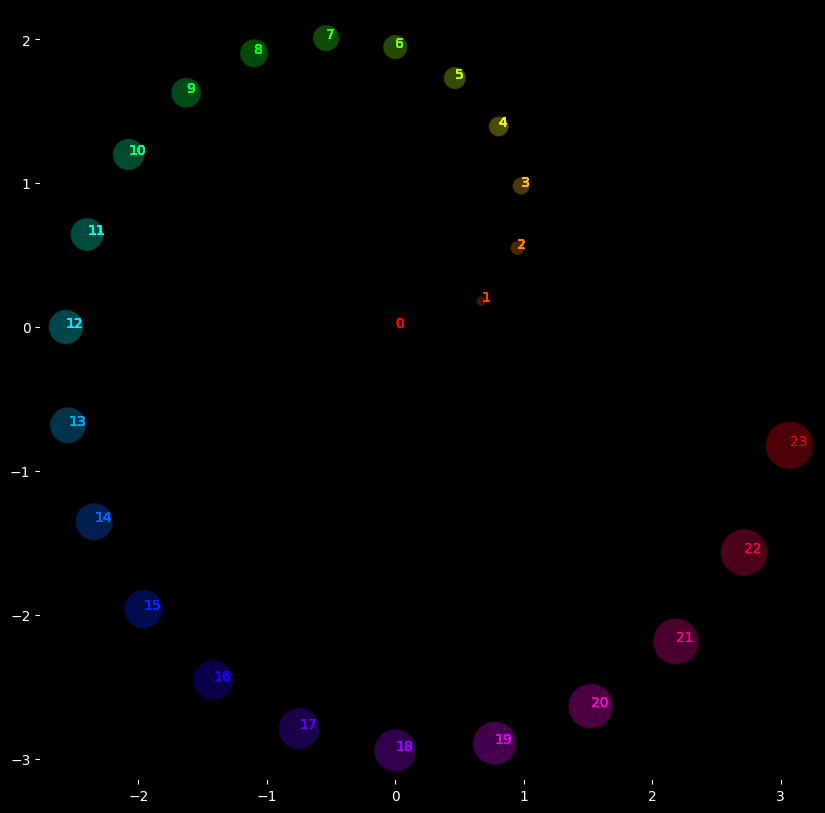

In [8]:
cf.get_atlas_video_text(
    atlas_in=mod_24_log_clk,
    symbol=np.arange(mod_24_log_clk.size),
    fps=1,
    colormap=plt.cm.hsv,
    output_path='./readme/VAR_mod_24_log_clk.mp4',
    variable_size=1,
    fixed_size=12,
    padding=0.2,
    sx=10,
    sy=10,
    text_size=10,
    alpha=0.3
)


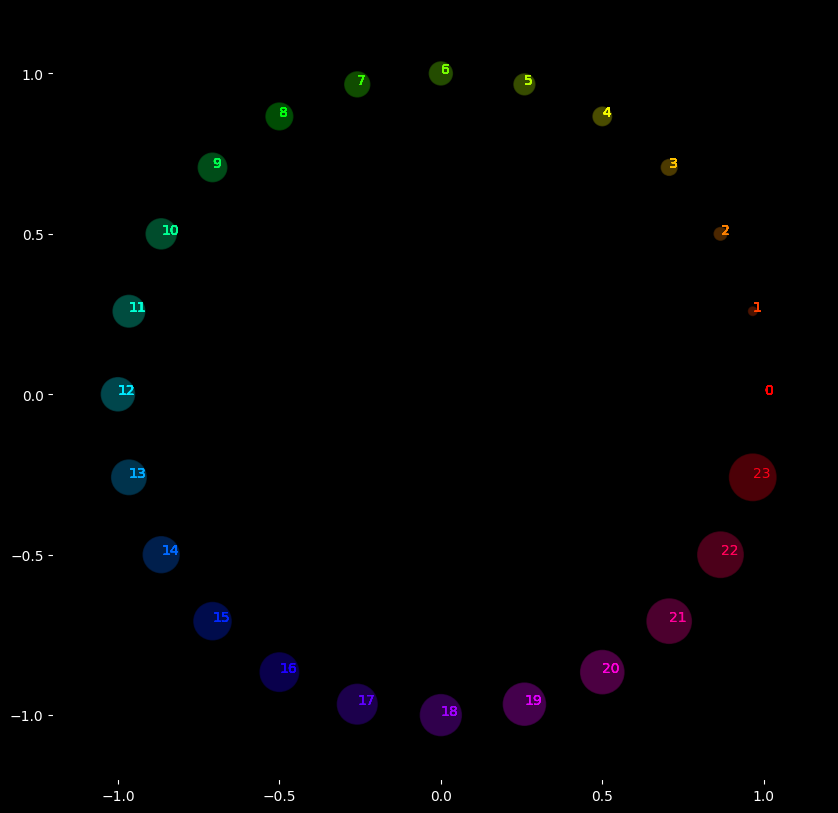

In [9]:
cf.get_atlas_video_text(
    atlas_in=mod_24_clk,
    symbol=np.arange(mod_24_clk.size),
    fps=1,
    colormap=plt.cm.hsv,
    output_path='./readme/VAR_mod_24_clk.mp4',
    variable_size=1,
    fixed_size=12,
    padding=0.2,
    sx=10,
    sy=10,
    text_size=10,
    alpha=0.3
)


# Testing the idea with real world data

In [10]:
start = pd.Timestamp('2023-01-01 00:00:00')
end = pd.Timestamp('2029-12-31 23:00:00')
freq ='H'
df  = cf.create_random_climate_data(start,end,freq)
year, month, day, hour, minute, second, temperature, humidity, pressure = cf.extract_climate_data(df)
h = np.arange(len(df.index))
h.size

61368

In [11]:
h    = h
h_24 = hour
d    = day
m    = month
y    = year

T_h =   24
T_d =   31 # to be changed inside the loop in the function maxdays 28,29,30 or 31
T_m =   12
T_y =   7

r_y =   1
r_m =   1
r_d =   1
r_h =   1


# Initializing a dummy atlas for preallocation
y_hat = r_y*np.exp((2*np.pi*1j/T_y)*y)
m_hat = r_m*np.exp((2*np.pi*1j/T_m)*m)
d_hat = r_d*np.exp((2*np.pi*1j/T_d)*d)
h_hat = r_h*np.exp((2*np.pi*1j/T_h)*h)
atlas = y_hat + m_hat +d_hat+h_hat 



## A random symbol

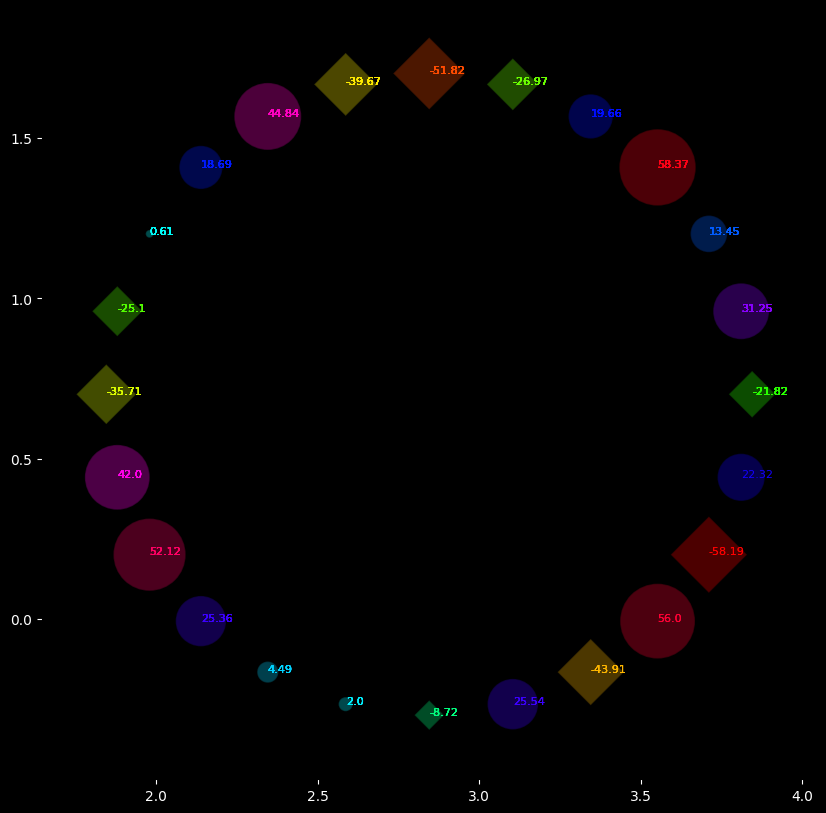

In [12]:
atlas_in=atlas[0:24]
symbol_in=np.round(temperature[0:24],2)
cf.get_atlas_video_text(
    atlas_in=atlas_in,
    symbol=symbol_in,
    fps=1,
    colormap=plt.cm.hsv,
    output_path='./readme/random_walk.mp4',
    variable_size=1,
    fixed_size=12,
    padding=0.2,
    sx=10,
    sy=10,
    text_size=8,
    alpha=0.3
)


## A cosine

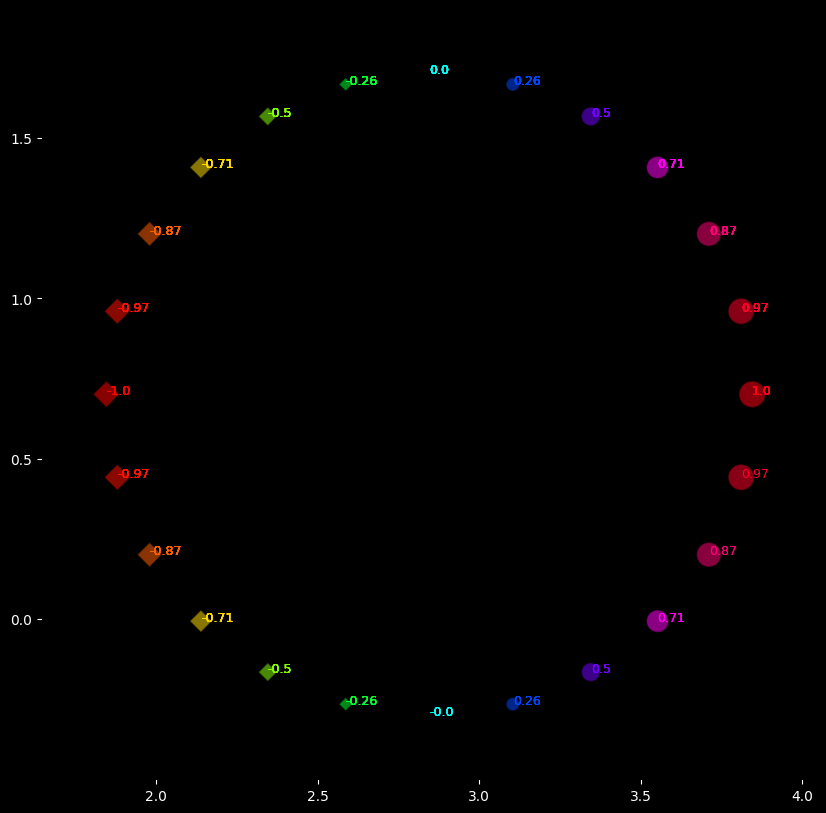

In [13]:
T_o=24
w_o=(2*np.pi)/T_o
atlas_in=atlas[0:24]
n=np.arange(len(atlas_in),dtype='float')
symbol_in=np.round(np.cos(w_o*n),2)

cf.get_atlas_video_text(
    atlas_in=atlas_in,
    symbol=symbol_in,
    fps=1,
    colormap=plt.cm.hsv,
    output_path='./readme/cosine_24.mp4',
    variable_size=1,
    fixed_size=90,
    padding=0.2,
    sx=10,
    sy=10,
    text_size=9,
    alpha=0.54
)


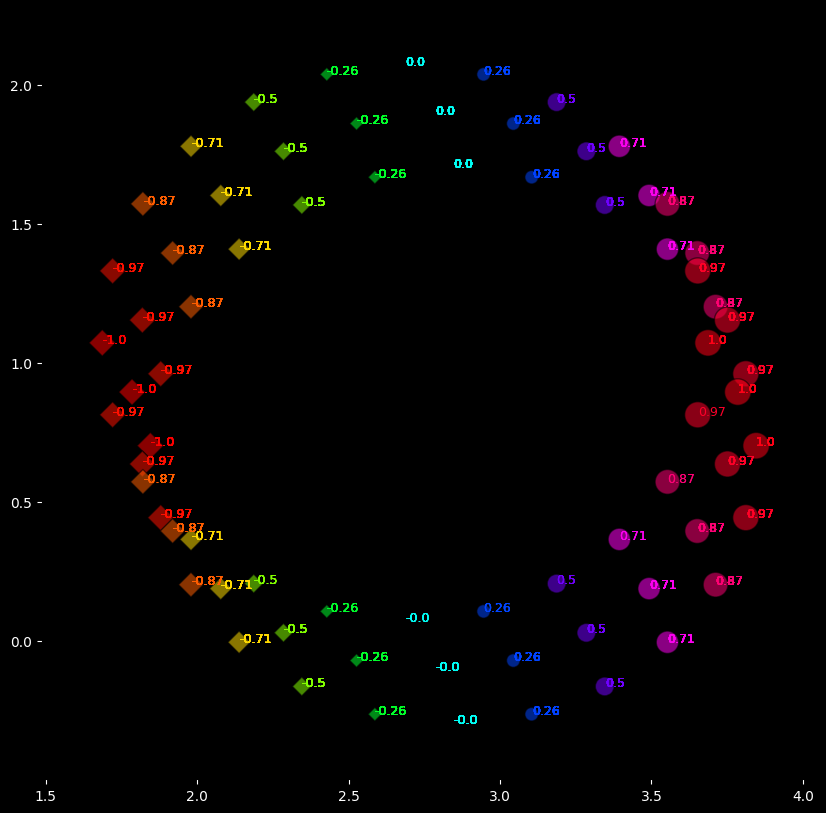

In [14]:
T_o=24
w_o=(2*np.pi)/T_o
atlas_in=atlas[0:24*3]
n=np.arange(len(atlas_in),dtype='float')
symbol_in=np.round(np.cos(w_o*n),2)

cf.get_atlas_video_text(
    atlas_in=atlas_in,
    symbol=symbol_in,
    fps=1,
    colormap=plt.cm.hsv,
    output_path='./readme/cosine.mp4',
    variable_size=1,
    fixed_size=90,
    padding=0.2,
    sx=10,
    sy=10,
    text_size=9,
    alpha=0.54
)


## Filtered representation of the cosine function (First try)

In [15]:
r_y=24
r_m=12
r_d=3
r_h=1
T_color=T_h
symbol_color=hour

# Initializing a dummy atlas for preallocation
y_hat_f1 = r_y*np.exp((2*np.pi*1j/T_y)*y)
m_hat_f1 = r_m*np.exp((2*np.pi*1j/T_m)*m)
d_hat_f1 = r_d*np.exp((2*np.pi*1j/T_d)*d)
h_hat_f1 = r_h*np.exp((2*np.pi*1j/T_h)*h)
atlas_filter_1 = y_hat_f1 + m_hat_f1 +d_hat_f1+h_hat_f1 

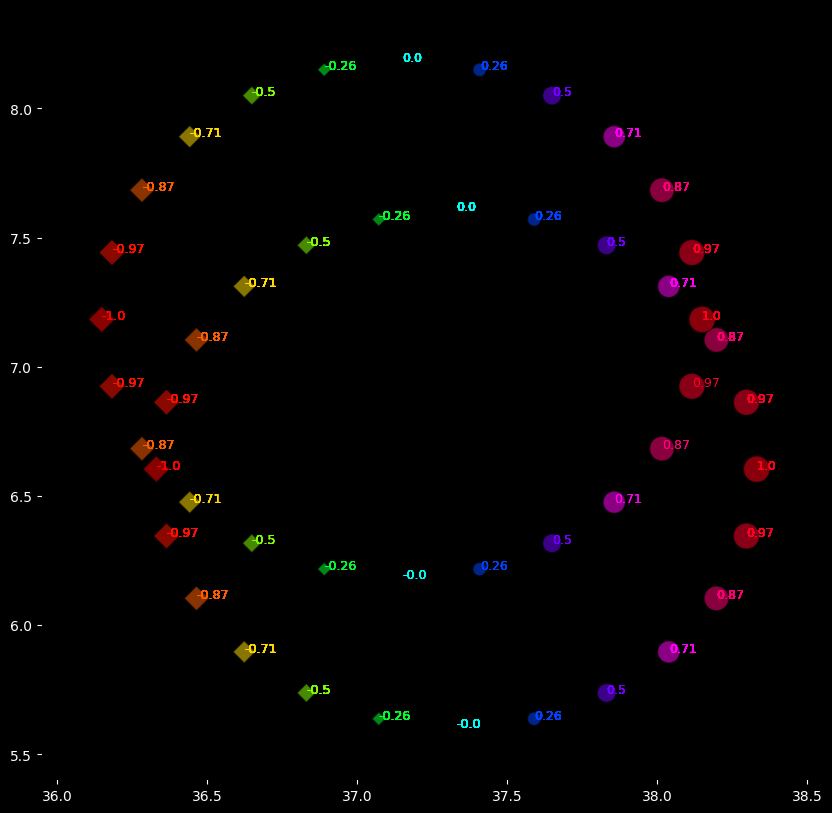

In [16]:
T_o=24
w_o=(2*np.pi)/T_o
atlas_in=atlas_filter_1[0:24*2]
n=np.arange(len(atlas_in),dtype='float')
symbol_in=np.round(np.cos(w_o*n),2)

cf.get_atlas_video_text(
    atlas_in=atlas_in,
    symbol=symbol_in,
    fps=1,
    colormap=plt.cm.hsv,
    output_path='./readme/cosine_filtered_representation.mp4',
    variable_size=1,
    fixed_size=90,
    padding=0.2,
    sx=10,
    sy=10,
    text_size=9,
    alpha=0.54
)


### The angle in the interval $-\pi$ , $\pi$

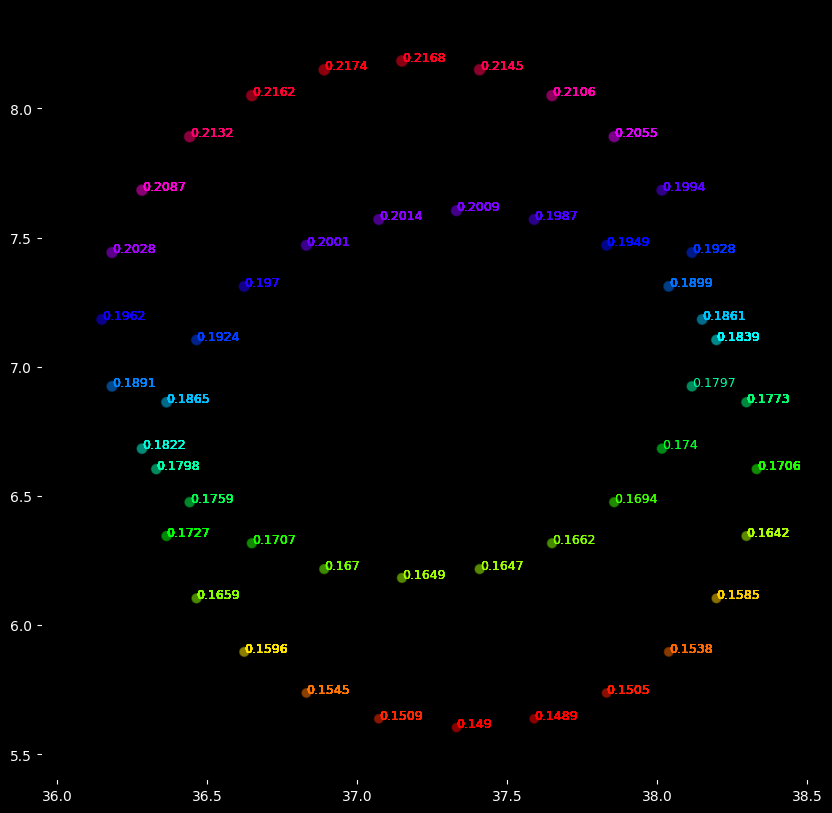

In [17]:
T_o=24
w_o=(2*np.pi)/T_o
atlas_in=atlas_filter_1[0:24*2]
n=np.arange(len(atlas_in),dtype='float')
symbol_in=np.round(np.angle(atlas_in),4)

cf.get_atlas_video_text(
    atlas_in=atlas_in,
    symbol=symbol_in,
    fps=1,
    colormap=plt.cm.hsv,
    output_path='./readme/the_hourly_angle_for_a_day_2.mp4',
    variable_size=1,
    fixed_size=90,
    padding=0.2,
    sx=10,
    sy=10,
    text_size=9,
    alpha=0.54
)


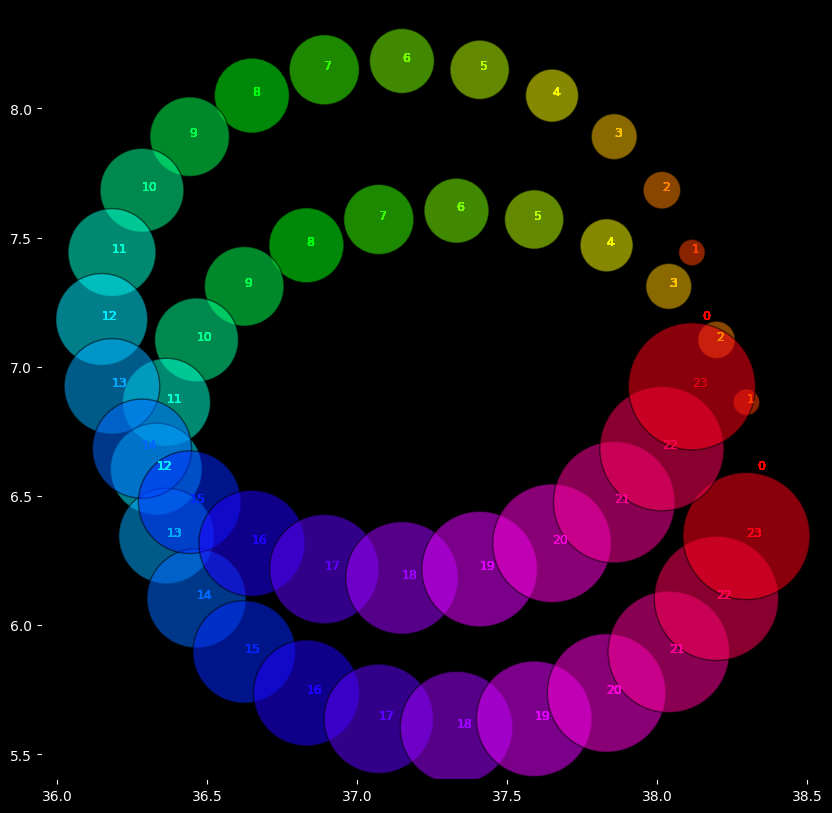

In [18]:
T_o=24
w_o=(2*np.pi)/T_o
atlas_in=atlas_filter_1[0:24*2]
n=np.arange(len(atlas_in),dtype='float')
# symbol_in=np.round(np.angle(atlas_in),2)
symbol_in=h_24

cf.get_atlas_video_text(
    atlas_in=atlas_in,
    symbol=symbol_in,
    fps=1,
    colormap=plt.cm.hsv,
    output_path='./readme/the_hour_2_days.mp4',
    variable_size=1,
    fixed_size=90,
    padding=0.2,
    sx=10,
    sy=10,
    text_size=9,
    alpha=0.54
)


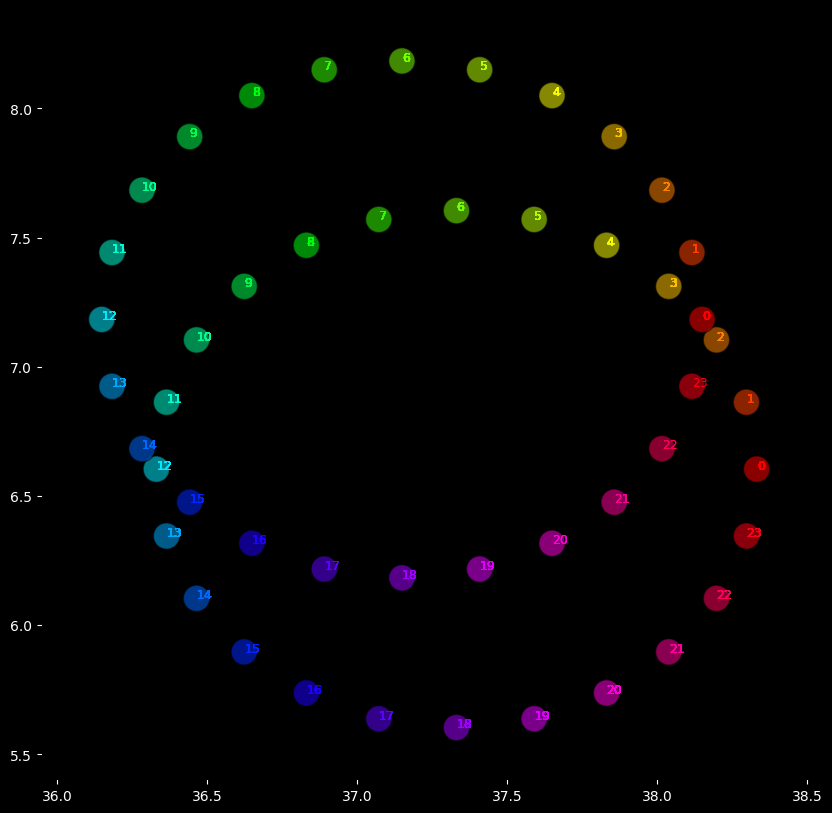

In [19]:
T_o=24
w_o=(2*np.pi)/T_o
atlas_in=atlas_filter_1[0:24*2]
n=np.arange(len(atlas_in),dtype='float')
# symbol_in=np.round(np.angle(atlas_in),2)
symbol_in=h_24

cf.get_atlas_video_text(
    atlas_in=atlas_in,
    symbol=symbol_in,
    fps=1,
    colormap=plt.cm.hsv,
    output_path='./readme/the_hour_2_days_fixed.mp4',
    variable_size=0,
    fixed_size=90,
    padding=0.2,
    sx=10,
    sy=10,
    text_size=9,
    alpha=0.54
)


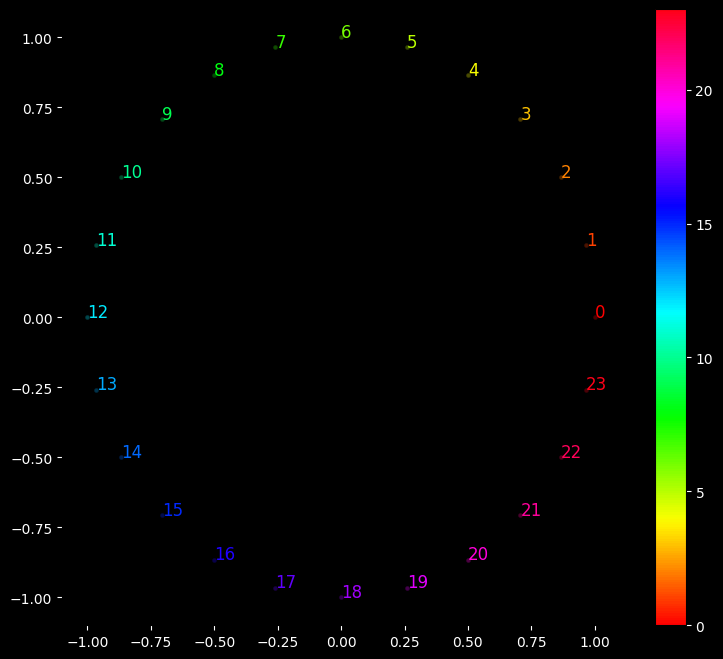

In [20]:
cf.plot_atlas_text(atlas=mod_24_clk
                ,symbol=np.arange(mod_24_clk.size),
                cmap=plt.cm.hsv,
                alpha=0.3,
                sx=9,
                sy=8,
                legend_flag=1,
                variable_sizes=0,
                base_size=12)

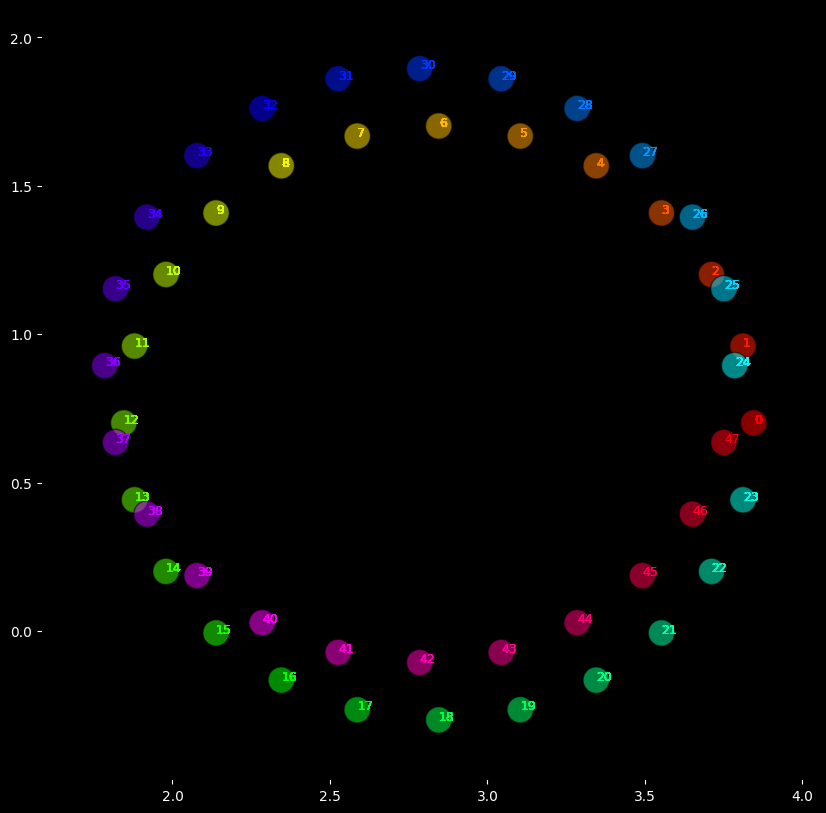

In [21]:
T_o=24
w_o=(2*np.pi)/T_o
atlas_in=atlas[0:24*2]
n=np.arange(len(atlas_in),dtype='float')
# symbol_in=np.round(np.angle(atlas_in),2)
symbol_in=h[0:24*2]

cf.get_atlas_video_text(
    atlas_in=atlas_in,
    symbol=symbol_in,
    fps=1,
    colormap=plt.cm.hsv,
    output_path='./readme/the_hour_2_days_fixed_total_hours.mp4',
    variable_size=0,
    fixed_size=90,
    padding=0.2,
    sx=10,
    sy=10,
    text_size=9,
    alpha=0.54
)


## Basic functions explanation draft

1. `compass(r, T, s)`: Returns the complex number representing a point on a compass given the radius `r`, total points `T`, and current point `s`.

2. `init_atlas(sx, sy)`: Initializes a new figure with the given size `sx` (width) and `sy` (height).

3. `see_atlas(atlas, symbol_size, symbol_shape)`: Plots the points in the `atlas` using scatter plot with the specified `symbol_size` and `symbol_shape`.

4. `color_atlas(atlas, symbol_size, symbol_shape, symbol_color, cmap, T_color)`: Plots the points in the `atlas` using scatter plot with the specified `symbol_size`, `symbol_shape`, and `symbol_color`. The `symbol_color` values are mapped to colors using the colormap `cmap` with `T_color` as the total number of colors.

5. `atlas_view(symbol, T_symbol, atlas, symbol_size, symbol_shape, symbol_color, cmap, T_color, char_flag, T_char, char_color, char_size, cmap_char)`: Plots the points in the `atlas` using scatter plot with the specified `symbol_size`, `symbol_shape`, and `symbol_color`. Additionally, it can display characters associated with each symbol if `char_flag` is `True`. The characters are represented by values in `symbol` modulo `T_symbol` and displayed with the specified `char_size`, `char_color`, and `cmap_char` colormap.

6. `compass_signed(r, T_pos, T_neg, s)`: Returns the complex number representing a point on a signed compass given the radius `r`, total positive points `T_pos`, total negative points `T_neg`, and current point `s`.

7. `get_colors(symbol, cmap, variable_sizes, base_size)`: Returns a tuple containing marker shapes, colormap normalization, colors, normalized sequence, and sizes based on the `symbol` values, colormap `cmap`, and other parameters.

8. `plot_atlas(atlas, symbol, cmap, alpha, sx, sy, legend_flag, variable_sizes, base_size)`: Plots the points in the `atlas` using scatter plot with the specified `symbol`, colormap `cmap`, transparency `alpha`, figure size `sx` and `sy`. It also supports legends based on `legend_flag`, variable sizes based on `variable_sizes`, and base size `base_size`.

9. `plot_atlas_text(atlas, symbol, cmap, alpha, sx, sy, legend_flag, variable_sizes, base_size)`: Plots the points in the `atlas` using scatter plot with text labels for each point. It takes the same parameters as `plot_atlas`, with the addition of displaying the text labels.

10. `get_atlas_video(atlas_in, symbol, fps, colormap, output_path, variable_size, fixed_size, padding, sx, sy)`: Generates a video animation of the points in the `atlas_in` using scatter plot. The animation is saved at `output_path` with a specified frames per second `fps`. It supports variable sizes based on `variable_size`, fixed size based on `fixed_size`, and padding around the points.

11. `get_atlas_video_text(atlas_in, symbol, fps, colormap, output_path, variable_size, fixed_size, padding, sx, sy, text_size, alpha)`: Generates a video animation of the points in the `atlas_in` using scatter plot with text labels. The animation is saved at `output_path` with a specified frames per second `fps`. It supports variable sizes

In [22]:
symbol    =14*np.sin(2*np.pi/24*np.arange(len(atlas)))
cmap=plt.cm.coolwarm
cf.plot_atlas(atlas=atlas,symbol=symbol,cmap=cmap,alpha=0.5,sx=20,sy=20,legend_flag=1)

TypeError: plot_atlas() missing 2 required positional arguments: 'variable_sizes' and 'base_size'